## Load the processed data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("./Churn_modelling_processed_data.csv")

In [10]:
data.head()

,CreditScoreScaled,Germany,Spain,GenderCoded,AgeScaled,Tenure,BalanceScaled,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalaryScaled,Exited
0,0.538,0,0,0,0.324324,2,0.000000,1,1,1,0.506735,1
1,0.516,0,1,0,0.310811,1,0.334031,1,0,1,0.562709,0
2,0.304,0,0,0,0.324324,8,0.636357,3,1,0,0.569654,1
3,0.698,0,0,0,0.283784,1,0.000000,2,0,0,0.469120,0
4,1.000,0,1,0,0.337838,2,0.500246,1,1,1,0.395400,0


## Predictors and Target

In [11]:
features = data.columns.to_list()

In [12]:
target = 'Exited'

In [13]:
features.remove(target)

In [14]:
X = data[features].values

In [15]:
y = data[target].values

## Split the dataset into train and test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2022)

## Build random forest classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_clf = RandomForestClassifier(n_estimators=50, min_samples_leaf=20)

In [34]:
rf_clf.fit(X_train, y_train)   # training the random forest classifier

RandomForestClassifier(min_samples_leaf=20, n_estimators=50)

**Check the model performance**

In [29]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [35]:
y_pred = rf_clf.predict(X_test)

In [36]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.864

In [37]:
f1_score(y_test, y_pred)

0.569620253164557

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1988
           1       0.76      0.49      0.60       512

    accuracy                           0.86      2500
   macro avg       0.82      0.73      0.76      2500
weighted avg       0.86      0.86      0.85      2500



In [26]:
pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred), index=['Actual-0', 'Actual-1'], columns=['Predicted-0','Predicted-1'])

,Predicted-0,Predicted-1
Actual-0,1909,79
Actual-1,261,251


## AdaBoost Classifier

**Influence vs error rate in AdaBoost Classifer**

In [2]:
error_rate = np.arange(0.001, 0.999, 0.001)

In [3]:
influence = 0.5 * np.log((1 - error_rate) / error_rate)

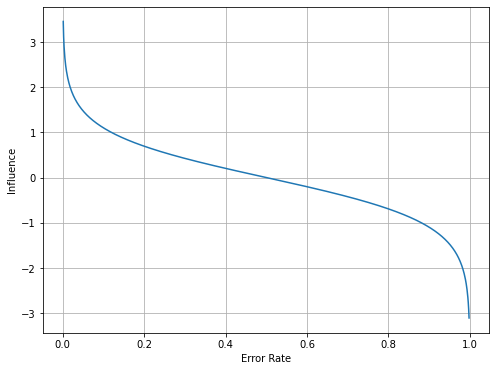

In [7]:
plt.figure(figsize=(8,6))
plt.plot(error_rate, influence)
plt.grid()
plt.xlabel("Error Rate")
plt.ylabel("Influence")
plt.show()

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
adb_clf = AdaBoostClassifier()

In [40]:
adb_clf.fit(X_train, y_train)

AdaBoostClassifier()

**Check the performance of the model**

In [41]:
y_pred = adb_clf.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred)

0.8592

In [43]:
f1_score(y_test, y_pred)

0.5717761557177616

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1988
           1       0.76      0.46      0.57       512

    accuracy                           0.86      2500
   macro avg       0.82      0.71      0.74      2500
weighted avg       0.85      0.86      0.85      2500



In [46]:
pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred), index=['Actual-0', 'Actual-1'], columns=['Predicted-0','Predicted-1'])

,Predicted-0,Predicted-1
Actual-0,1913,75
Actual-1,277,235
